# Data Science and Business Analytics - Task 2

## Prediction Using Unsupervised ML 

### The task will
#### Cosider the famous dataset 'Iris', predict the optimum number of clusters and represent it visually.

### For this task, I may use KMeans Clustering algorithm.

### Presented by :
#### Januka Shehan Fernando

In [72]:
## Importing the relevant libraries

In [73]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Importing data

In [74]:
df = pd.read_csv('Iris.csv')

In [75]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Analysing and visualizing data 

In [76]:
df.shape

(150, 6)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [78]:
# We can conclude that the dataset has no null values and the four attributes are numerical. 

In [79]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [80]:
# Let us figure out the whether the attributes has any outliers 

D:\Softwares\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalLengthCm'>

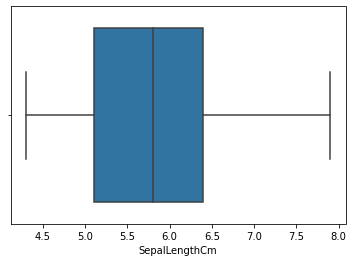

In [81]:
sb.boxplot(df['SepalLengthCm'])

D:\Softwares\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalWidthCm'>

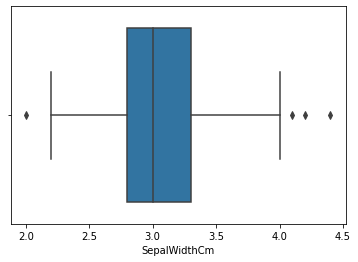

In [82]:
sb.boxplot(df['SepalWidthCm'])

D:\Softwares\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PetalLengthCm'>

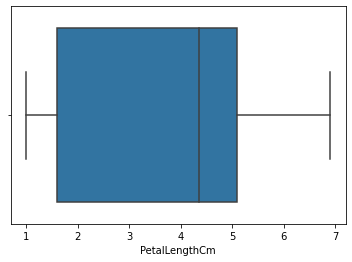

In [83]:
sb.boxplot(df['PetalLengthCm'])

D:\Softwares\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PetalWidthCm'>

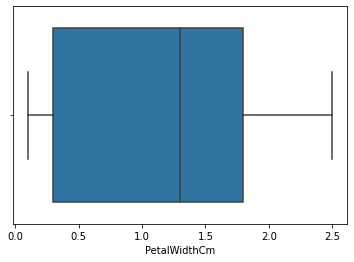

In [84]:
sb.boxplot(df['PetalWidthCm'])

In [85]:
# Removing outliers

for x in ['SepalWidthCm']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

D:\Softwares\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalWidthCm'>

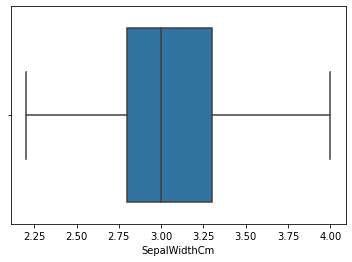

In [86]:
sb.boxplot(df['SepalWidthCm'])

In [89]:
df['SepalWidthCm'] = df['SepalWidthCm'].fillna(df['SepalWidthCm'].mean())

In [90]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

D:\Softwares\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalWidthCm'>

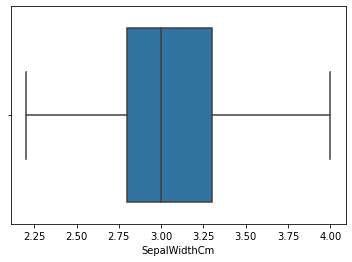

In [91]:
sb.boxplot(df['SepalWidthCm'])

In [96]:
# Let's visualize the features and its counts according to the data set

D:\Softwares\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

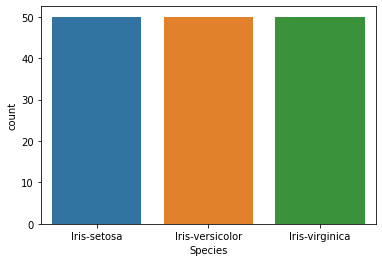

In [97]:
sb.countplot(df['Species'])

In [98]:
# We can conclude that the dataset is a balanced dataset.

## Preparing the dataset

In [99]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [100]:
# It is clear that we are having three species or desired number of clusters.

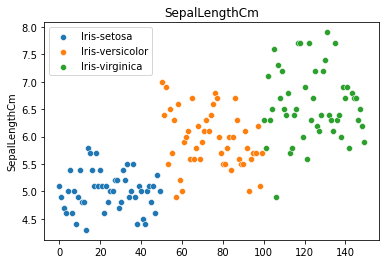

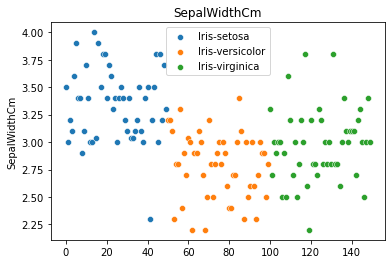

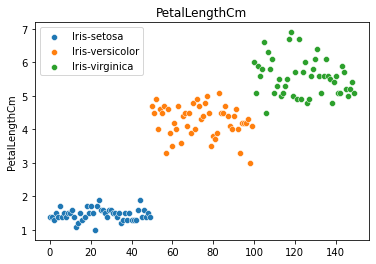

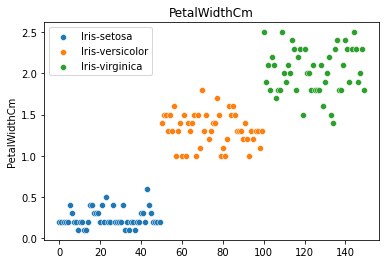

In [141]:
for i in [1,2,3,4]:
    sb.scatterplot(data = df.loc[df.Species == 'Iris-setosa'][df.columns[i]], label = "Iris-setosa")
    sb.scatterplot(data = df.loc[df.Species == 'Iris-versicolor'][df.columns[i]], label = "Iris-versicolor")
    sb.scatterplot(data = df.loc[df.Species == 'Iris-virginica'][df.columns[i]], label = "Iris-virginica")
    plt.title(df.columns[i])
    plt.show()

In [146]:
# Dropping columns id and Species

df = df.drop(['Id' , 'Species'], axis = 1)

In [147]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Finding number of clusters

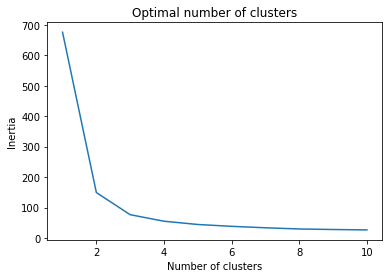

In [151]:
# Finding the optimum number of clusters for k-means classification

x = df.iloc[:, [0, 1, 2, 3]].values

#Importing KMeans algorithm from sklearn
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 

plt.plot(range(1, 11), wcss)
plt.title('Optimal number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia') 
plt.show()

In [152]:
# It is clear that the optimal number of clusters obtained from the dataset is 3.

In [168]:
# Obtaining the centroid positions
kmeans = KMeans(n_jobs = -1, n_clusters = 3, init = 'k-means++')
kmeans.fit(x)
kmeans.cluster_centers_

D:\Softwares\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


array([[5.006     , 3.34621918, 1.464     , 0.244     ],
       [5.9016129 , 2.76511268, 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [169]:
lbl = kmeans.labels_

In [170]:
# Inserting new column 'Species' to display the obtained label for each data row
df['Species'] = lbl

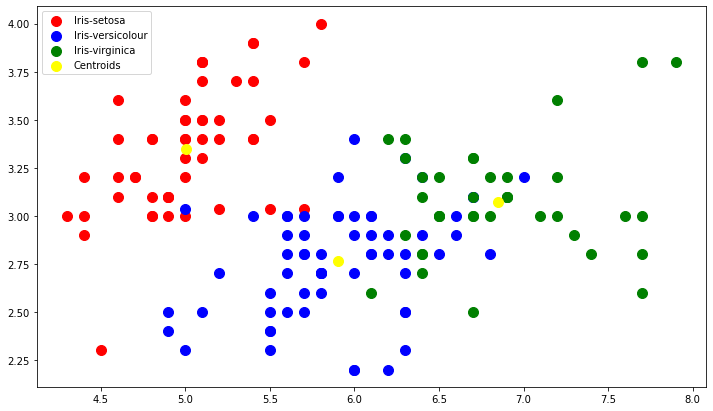

In [188]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(12,7))

plt.scatter(x[lbl == 0, 0], x[lbl == 0, 1],
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[lbl == 1, 0], x[lbl == 1, 1],
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[lbl == 2, 0], x[lbl == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()